# Chapter 1: 线性回归

线性回归可以说是机器学习领域的“Hello World”程序。它是最简单、最基础的监督学习算法之一，广泛应用于各种领域，如经济学、医学、工程等。线性回归的目标是通过拟合一条直线来描述输入变量（自变量）与输出变量（因变量）之间的关系，从而实现对未知数据的预测。

## Section 1.1: 监督学习的一般化原理

### 模型与决策函数

对于学习任务，我们希望让机器能够在学习之后，能够根据给定的输入数据，预测出对应的输出结果。机器学习到的这种从输入到输出的映射关系，被称为模型（Model）。这种映射关系可以是线性的，也可以是非线性的，但一般被抽象成一个函数的形式：

$$
\hat{y} = f(X)
$$

其中，$\hat{y}$ 是预测的输出结果，$X$ 是输入数据，$f$ 是决策函数。

### 参数空间和损失函数

知道了学习的目标之后，我们的关注点就转移到“怎样学习”上。事实上，模型通过已有的数据不断调整自身的参数 $\theta$，使得通过决策函数计算出的预测结果 $\hat{y}$ 尽可能地好，并且相信在所有的 $\theta$ 中，存在一个最优的 $\theta^*$，使得预测结果 $\hat{y}$ 最好。因此，“怎样学习”这个问题就变成了“怎样找到最优的 $\theta^*$”。

监督学习中，我们给模型提供用于训练的数据是带标签的，相当于给学生提供带答案的习题，学生通过建立“问题”和“答案”的联系完成学习的过程，之后在面对没有答案的新问题时，能够根据之前学到的知识进行预测。对于机器学习领域，模型通过训练数据的输入和输出，学习到输入和输出之间的关系即决策函数 $f$。显而易见的，评判学习效果的好坏可以通过预测结果 $\hat{y}$ 和真实结果 $y$ 之间的差异来衡量。通常，我们使用损失函数（Loss Function） $L(y, f(X))$ 来量化这种差异，损失函数的值越小，表示模型的预测结果越接近真实结果。

对于分类问题，采用 0-1 损失函数是一个常见的选择，因为对于用户来说，只有“预测正确”或“预测错误”两种结果：

$$
L(y, f(X)) =
\begin{cases}
0 & \text{if } y = f(X) \\
1 & \text{if } y \neq f(X) \\
\end{cases}
$$

另一种常见选择是交叉熵损失函数（Cross-Entropy Loss），当处理多分类问题时，通常使用 softmax 函数来计算每个类别的预测概率，交叉熵理论上是最匹配、最标准的损失函数：

$$
L(y, f(X)) = -\sum_{i=c}^{C} y_c \log(f_c(X))
$$

其中 $C$ 是类别数，$y_c$ 是真实标签的 one-hot 编码，$f_c(X)$ 是模型对类别 $c$ 的预测概率。

对于回归问题，损失函数通常使用均方误差（Mean Squared Error, MSE）来衡量预测值和真实值之间的差异：

$$
L(y, f(X)) = (y - f(X))^2
$$


### 期望风险和经验风险

对于输入、输出空间 $\mathcal{X}, \mathcal{y}$ 中所有可能的 $X$ 和 $y$ 的取值，可以将其抽象为联合概率分布 $P(X, y)$。我们希望模型能够在一般情况下有着好的表现，即损失函数 $L(y, f(X))$ 在联合概率分布 $P(X, y)$ 下的期望值 $\mathbb{E}_{P(X, y)}[L(y, f(X))]$ 最小化。将这个期望值记为 $R_{exp}(f)$，表示风险函数（Risk Function），则：

$$
R_{exp}(f) = \mathbb{E}_{P(X, y)}[L(y, f(X))] = \int_{\mathcal{X} \times \mathcal{y}} L(y, f(X)) P(X, y) \mathrm{d}X \mathrm{d}y
$$

然而，我们不可能知道所有的 $X$ 和 $y$，因此无法计算出 $P(X, y)$，也就无法直接计算出风险函数 $R_{exp}(f)$。事实上，如果已经知道了 $P(X, y)$，就可以直接通过求出 $P(y | X)$ 来得到最好的 $y$；正因为不能直接这样计算，才需要进行学习。从某种程度上说，由于样本的有限，这里的学习其实是一种“不完全归纳”，可能产生错误的结论，但我们容许极少量的错误，或者较为接近正确的结论。

从这种“不完全”的观点出发，我们只能让风险函数在目前可得的训练数据上最小化。假设我们有 $n$ 个训练样本 $\{(X_i, y_i)\}_{i=1}^n$，则风险函数可以近似为：

$$
R_{emp}(f) = \frac{1}{n} \sum_{i=1}^n L(y_i, f(X_i))
$$

这里的 $R_{emp}(f)$ 称为经验风险（Empirical Risk），它是对风险函数 $R_{exp}(f)$ 的一种近似。

回到我们刚才提到的“最小化风险”的目标，很自然地，我们可以通过最小化经验风险 $R_{emp}(f)$ 来找到最优的模型参数 $\theta^*$：

$$
\theta^* = \arg \min_{\theta} R_{emp}(f_\theta(X)) = \arg \min_{\theta} \frac{1}{n} \sum_{i=1}^n L(y_i, f_\theta(X_i))
$$

这样来看，机器学习的训练问题也就是一个优化问题。

### 过拟合与正则化

直到这里，我们并没有完成所有工作。注意我们的学习过程是在一个有限的样本集上进行的，经验风险最小化并不能保证模型在整个输入输出空间上的“期望风险”最小化。如果样本容量很小，经验风险最小化使得在训练数据集上的效果很好，但是在测试数据集上效果却很差，这种现象被称为过拟合（Overfitting）。同样使用“学生”的例子，如果给学生提供的习题覆盖面很小，他可能在这方面的做题准确率很高，但是在面对新的习题时，可能就无法正确解答了。

过拟合现象是模型为了完全拟合训练数据而过度复杂化的结果。一个很浅近的例子是，一系列大致呈线性关系的数据点，如果我们使用一个高次多项式来拟合它们，可能会得到一个非常复杂的曲线，这条曲线在训练数据上表现很好，但是在新的数据点上可能不如粗略的线性拟合效果好。为了避免过拟合，我们需要在模型复杂度和训练数据的拟合程度之间找到一个平衡点。当模型过于复杂时，我们可以给予一定惩罚。一般使用正则化项（Regularization Term）衡量模型的复杂度，将这个项加入优化目标后，得到的优化目标变为最小化经验风险和正则化项的加权和：

$$
\theta^* = \arg \min_{\theta} \left( R_{emp}(f_\theta(X)) + \lambda J(\theta) \right)
$$

正则化项的形式 $J(\theta)$ 可以是模型参数的范数（如 L1 范数或 L2 范数），$\lambda$ 是正则化系数，用于控制正则化项的权重。通过调整 $\lambda$ 的值，我们可以在拟合训练数据和控制模型复杂度之间找到一个平衡点，从而提高模型在新数据上的泛化能力。

以上内容就是关于监督学习通用理论的讨论。

----

## Section 1.2: 线性回归的数学原理

### 线性的本质

线性回归的核心思想是通过线性函数来描述输入变量与输出变量之间的关系。对于单一特征输入，线性回归模型可以表示为：

$$
y = wx + b
$$

这也是我们在初中学过的线性方程，其中 $w$ 是斜率，$b$ 是截距。

实际上，输入变量 $x$ 可以是多维的，即一个样本是具有多个特征的列向量。暂时将特征的维度记为 $n$，从矩阵的视角，为了让维度匹配，线性回归模型可以表示为：

$$
y_{1\times 1} = W_{1\times n} X_{n\times 1} + b_{1\times 1}
$$

### 矩阵化的处理思想

线性回归模型只能处理数值类型的数据，因此我们假设进入模型的数据已经经过正确的预处理。

对于 Python 来说，将所有样本的所有特征放在一个矩阵中一起处理是更加简洁并且高效的方式，于是产生了一个很自然的问题：如何将输入输出空间中的所有样本和特征都放在一个矩阵中进行处理？记样本数为 $m$，特征数为 $n$，输入矩阵 $X$ 应该表示为 $m\times n$ 的矩阵还是 $n\times m$ 的矩阵？

通常情况下，输入矩阵 $X$ 被表示为 $m\times n$ 的形式是更为常见的。参考 Pandas DataFrame 的设计，行表示样本，列表示特征，在工程上的兼容性更好。这样，同时兼顾行列含义的设计和维度匹配问题，线性回归模型可以表示为：

$$
y_{m\times 1} = X_{m\times n} W_{n\times 1} + b_{m\times 1}
$$

值得一提的是，$b$ 的维度可以通过广播（Broadcasting）机制来处理。具体来说，$b_{m\times 1}$ 每个元素都是相同的偏置项，可以用一个标量 $b$ 代替。这样，在矩阵运算中，$b$ 会自动扩展到与 $X$ 相同的行数，从而实现正确的加法操作。这样，工程上的线性回归模型可以更简洁地表示为：

$$
y_{m\times 1} = X_{m\times n} W_{n\times 1} + b
$$

之后的讨论中，为了公式的简洁，我们将使用不带下标的写法，但是实际计算中需要注意维度的匹配。

### 损失函数的选择

线性回归的目标是找到最优的参数 $W$ 和 $b$，使得预测值 $y$ 与真实值之间的差异最小。通常使用均方误差（MSE）作为损失函数：

$$
L(y, \hat{y}) = \frac{1}{m} \sum_{i=1}^m (y_i - \hat{y}_i)^2
$$

### 优化目标与梯度下降

尽管我们在前文将损失函数写成 $L(y, \hat{y})$ 的形式，但实际上我们需要最小化的是损失函数关于参数 $W$ 和 $b$ 的值。将损失函数写成关于参数的形式：

$$
L(W, b) = \frac{1}{m} \sum_{i=1}^m (y_i - \hat{y}_i(W, b))^2
$$

优化的目标是：

$$
W^*, b^* = \arg \min_{W, b} L(W, b) = \arg \min_{W, b} \frac{1}{m} \sum_{i=1}^m (y_i - (X_i W + b))^2
$$

这里我们不加证明地指出，$L(W, b)$ 是一个严格的凸函数，因此存在唯一的全局最值；显然，损失函数可以趋向于正无穷（如果模型非常地烂，给出一个无穷远的预测结果），因此这个最值一定是最小值而不是最大值。因此，我们可以很方便的根据极值的定义得出，在这个最小值点处有：

$$
\frac{\partial L(W, b)}{\partial W} = 0, \quad \frac{\partial L(W, b)}{\partial b} = 0
$$

以此求得 $W^*$ 和 $b^*$ 的值。

在这里已经有两条方程和两个未知数了，理论上可以直接求解。但是由于实际问题中样本数 $m$ 可能非常大，直接求解可能会导致计算量过大，因此我们通常使用梯度下降法（Gradient Descent）来迭代地逼近最优解。

梯度下降法的核心思想是通过计算损失函数关于参数的梯度，然后沿着梯度的反方向更新参数，从而逐步逼近最优解。具体地，梯度下降法的更新规则为：

$$
W \leftarrow W - \eta \frac{\partial L(W, b)}{\partial W}, \quad b \leftarrow b - \eta \frac{\partial L(W, b)}{\partial b}
$$

这里 $\eta$ 是学习率（Learning Rate），控制每次更新的步长。通过不断（有限次数）迭代这个过程，我们可以逐渐找到最优的参数 $W^*$ 和 $b^*$。

进一步的，基于链式法则和矩阵的求导运算，我们给出梯度的具体计算公式及其推导：

$$
\begin{aligned}
\frac{\partial L(W, b)}{\partial W} &= \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial W} \\
&= -\frac{2}{m} \sum_{i=1}^m (y_i - (X_i W + b)) X_i^T \\
&= -\frac{2}{m} X^T (y - (X W + b)) \\
&= -\frac{2}{m} X^T (y - \hat{y}) \\
&= -\frac{2}{m} X^T (y - X W - b)
\end{aligned}
$$

$$
\begin{aligned}
\frac{\partial L(W, b)}{\partial b} &= \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial b} \\
&= -\frac{2}{m} \sum_{i=1}^m (y_i - (X_i W + b)) \\
&= -\frac{2}{m} \sum_{i=1}^m (y_i - \hat{y}_i) \\
\end{aligned}
$$


### 线性回归的闭式解求解

如前述，我们可以通过解析的方法直接求解线性回归的最优参数，而不需要迭代地进行梯度下降。这种方法被称为线性回归的闭式解（Closed-form Solution）。

闭式解的核心思想是通过矩阵运算来直接求解最优参数。对于线性回归模型，我们可以将损失函数写成矩阵的形式：

$$
L(W, b) = \frac{1}{m} (y - XW - b)^T (y - XW - b)
$$

通过对损失函数关于 $W$ 和 $b$ 的偏导数求解，我们可以得到以下方程：

$$
\begin{aligned}
\frac{\partial L(W, b)}{\partial W} &= -\frac{2}{m} X^T (y - XW - b) \\
\frac{\partial L(W, b)}{\partial b} &= -\frac{2}{m} \sum_{i=1}^m (y_i - \hat{y}_i) \\
\end{aligned}
$$

将这两个方程联立，我们可以得到以下矩阵方程：

$$
X^T (y - XW - b) = 0
$$

通过对这个方程进行变形，我们可以得到闭式解的公式：

$$
W^* = (X^T X)^{-1} X^T y
$$

$$
b^* = \frac{1}{m} \sum_{i=1}^m (y_i - X_i W^*)
$$

通过闭式解直接计算最优参数 $W^*$ 和 $b^*$ 的缺点也如前述，当样本数 $m$ 很大时，计算量会非常大，因此在实际应用中，我们通常还是使用梯度下降法来迭代地逼近最优解。

----


## Section 1.3: 线性回归的实现

### 自顶向下：`LinearRegression` 需要什么？

作为一个估计器，显然线性回归模型 `LinearRegression` 类需要继承自 `BaseEstimator` 类；同时，它也是一个回归器，因此需要继承自 `RegressorMixin` 类。

首先考虑 `LinearRegression` 的构造函数 `__init__()` 需要做什么方面的参数初始化：

线性回归没有太多需要调节的超参数，但由于内部使用了梯度下降法来优化参数，因此需要设置梯度下降需要的超参数——学习率和迭代次数。更加面向对象的做法是，将梯度下降的实现单独封装成一个类 `GradientDescent`，那么在 `LinearRegression` 的构造函数中只需要传入一个 `GradientDescent` 的实例 `optimizer` 即可。

另外，待优化的 `weights_` 和 `bias_` 也需要在构造函数中初始化为 `None`，表示它们还没有被训练出来。

`LinearRegression` 需要实现基类定义的抽象方法 `fit()` 和 `predict()`。`fit()` 方法用于训练模型，`predict()` 方法用于根据训练好的模型进行预测。

假定我们已经实现了 `GradientDescent` 类，那么 `fit()` 的内容就变得十分简洁，只需要对输入进行必要的合法性检验，然后调用 `optimizer` 的 `optimize()` 方法，最后将优化得到的参数赋值给 `weights_` 和 `bias_` 即可。

`predict()` 方法同样需要对输入进行合法性检验，然后根据线性回归的公式计算预测值并返回。

### 关键：`GradientDescent` 的实现

如前述，除了 `GradientDescent` 之外，`LinearRegression` 的实现再没有其他难点，剩余的只是一些简单的矩阵运算和其他细节处理。

对于 `GradientDescent` 类的构造函数，只需传入 `learning_rate` 和 `n_iterations` 两个参数，分別表示学习率和迭代次数。除此之外无需其他属性。（`tolerance` 等参数可以在后续实现中添加，用于控制收敛的精度。）

`GradientDescent` 类的核心方法仅有一个 `optimize()`，用于执行梯度下降算法。基于可复用性最大化的考虑，我们不仅需要传入训练数据 `X` ，标签 `y` 和待优化的参数表 `initial_params`，还需要提供计算梯度的法则，即一个可以调用的函数 `gradient_func`。这个梯度计算函数只需要传入 `X`、`y` 和当前的参数 `params`，就能够返回梯度的值（本质上是一个字典）。

在 `n_iterations` 次迭代中，每次只需要通过 `gradient_func` 计算当前参数的梯度表，然后根据梯度和学习率对 `params` 中的各个参数逐一更新即可。迭代结束后，返回最终的参数表。

回到线性回归模型，`LinearRegression` 还需要一个计算梯度的静态方法 `_calculate_gradient()`，它接受输入数据 `X`、标签 `y` 和当前参数 `params`，返回一个字典，包含梯度的值。这个方法可以作为 `GradientDescent.optimize()` 的 `gradient_func` 参数传入。

### 其他细节

另外，加入 `coef_` 和 `intercept_` 两个 property 是不错的选择，前者返回展平的 `weights_`，后者直接返回 `bias_`。

----


## Section 1.4: 测试

下面对线性回归模型的各项功能进行必要的测试：

导入必要的库和模块：

In [1]:
# Import necessary libraries
import numpy as np
from src.mlfromscratch.metrics.regression import mean_squared_error, root_mean_squared_error, r2_score
from src.mlfromscratch.models.linear_regression import LinearRegression
from src.mlfromscratch.compose import Pipeline, ColumnTransformer
from src.mlfromscratch.preprocessing.scaler import StandardScaler
from src.mlfromscratch.preprocessing.imputer import SimpleImputer
from src.mlfromscratch.optim.gradient_descent import GradientDescent
from src.mlfromscratch.utils import data_loader
from src.mlfromscratch.utils import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

`data_loader` 模块提供了多种数据集的加载功能，包括生成线性回归数据、分类数据等。查看可用的数据集：

In [2]:
data_loader.get_available_datasets()

{'regression': <function src.mlfromscratch.utils.data_loader.load_regression_data(n_samples=100, n_features=1, noise=10, random_state=42)>,
 'classification': <function src.mlfromscratch.utils.data_loader.load_classification_data(n_samples=100, n_features=2, n_classes=2, n_redundant=0, random_state=42)>,
 'moons': <function src.mlfromscratch.utils.data_loader.load_moons_data(n_samples=100, noise=0.1, random_state=42)>,
 'circles': <function src.mlfromscratch.utils.data_loader.load_circles_data(n_samples=100, noise=0.1, factor=0.8, random_state=42)>,
 'blobs': <function src.mlfromscratch.utils.data_loader.load_blobs_data(n_samples=100, centers=3, n_features=2, random_state=42)>,
 'diabetes': <function src.mlfromscratch.utils.data_loader.load_diabetes_data()>,
 'iris': <function src.mlfromscratch.utils.data_loader.load_iris_data()>,
 'wine': <function src.mlfromscratch.utils.data_loader.load_wine_data()>,
 'breast_cancer': <function src.mlfromscratch.utils.data_loader.load_breast_cancer_

使用生成式的 `load_regression_data()` 函数生成一些线性回归的数据，作为测试用例。这个函数可以生成带有噪声的线性数据，便于测试模型的拟合能力。

In [3]:
gen_X, gen_y = data_loader.load_regression_data(n_samples=50, n_features=1, noise=1, random_state=42)
gen_X.shape

(50, 1)

将生成的数据集分为训练集和测试集。这里使用 `train_test_split()` 函数将数据集随机分为 80% 的训练集和 20% 的测试集。这样可以确保模型在训练时不会过拟合，并且能够在测试集上进行评估。

In [4]:
gen_X_train, gen_X_test, gen_y_train, gen_y_test = train_test_split(gen_X, gen_y, test_size=0.2, random_state=42)
gen_X_train.shape, gen_X_test.shape, gen_y_train.shape, gen_y_test.shape

((40, 1), (10, 1), (40,), (10,))

对生成的数据进行合适的预处理，这里使用 `SimpleImputer` 和 `StandardScaler` 进行缺失值填充和标准化处理。虽然生成的数据没有缺失值，但这种预处理方式可以作为通用的预处理流程。

In [5]:
# preprocessing
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

X_train_imputed = imputer.fit_transform(gen_X_train)
X_train_scaled = scaler.fit_transform(X_train_imputed)

X_test_imputed = imputer.transform(gen_X_test)
X_test_scaled = scaler.transform(X_test_imputed)

对模型进行初始化和训练。这里使用自定义的 `LinearRegression` 类，并通过 `GradientDescent` 优化器来训练模型。设置学习率为 0.01，迭代次数为 10000 次。然后使用训练好的模型对测试集进行预测。

In [6]:
# initialize the model
model = LinearRegression(
    optimizer=GradientDescent(
        learning_rate=0.01,
        n_iterations=10000
    )
)

# fit the model
model.fit(X_train_scaled, gen_y_train)

# predict
gen_y_pred = model.predict(X_test_scaled)

gen_y_pred

array([ 15.28508343,  21.94958504,  -3.18576307,  -4.14344328,
       -27.86814302, -20.98563605,  -6.49831055,  -3.06593454,
       -17.29971721,   3.15130273])

测试 fit_predict() 方法。这个方法应该能够在训练集上拟合模型，并在测试集上进行预测。这里的 `fit_predict()` 方法是一个自定义的方法，通常用于简化模型的训练和预测流程。所得的测试结果应当与之前的预测结果相同。

In [7]:
gen_y_fit_pred = model.fit_predict(X=X_train_scaled, y=gen_y_train, X_test=X_test_scaled)
print(gen_y_pred == gen_y_fit_pred)

[ True  True  True  True  True  True  True  True  True  True]


测试 `Pipeline` 的使用，这里将预处理步骤和模型训练步骤组合在一起。所得结果应当与之前的预测结果相同。

In [8]:
pipeline = Pipeline(
    steps=[
        ('imputer', imputer),
        ('scaler', scaler),
        ('model', model)
    ]
)

gen_y_pipeline_pred = pipeline.fit_predict(X=gen_X_train, y=gen_y_train, X_test=gen_X_test)
print(gen_y_pred == gen_y_pipeline_pred)

[ True  True  True  True  True  True  True  True  True  True]


这里测试 `ColumnTransformer` 的使用，将预处理步骤应用于特定的列。由于生成的数据只有一个特征，因此只需要对第 0 列进行处理。所得结果应当与之前的预测结果相同。

In [9]:
pipeline_transformer = Pipeline(
    steps=[
        ('imputer', imputer),
        ('scaler', scaler)
    ]
)

# print(isinstance(pipeline_transformer, TransformerMixin))
column_transformer = ColumnTransformer(
    transformers=[
        ('num', pipeline_transformer, [0])
    ],
    remainder='drop'
)

X_train_col_transformed = column_transformer.fit_transform(gen_X_train)
X_test_col_transformed = column_transformer.transform(gen_X_test)

gen_y_pred_col_transformed = model.fit_predict(X=X_train_col_transformed, y=gen_y_train, X_test=X_test_col_transformed)
print(gen_y_pred == gen_y_pred_col_transformed)

[ True  True  True  True  True  True  True  True  True  True]


随后使用 MSE、RMSE 和 R² 分数等指标来评估模型的性能。这里使用了自定义的 `mean_squared_error`、`root_mean_squared_error` 和 `r2_score` 函数来计算这些指标。

In [10]:
# evaluate the model
mse = mean_squared_error(gen_y_test, gen_y_pred)
rmse = root_mean_squared_error(gen_y_test, gen_y_pred)
r2 = r2_score(gen_y_test, gen_y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'R^2 Score: {r2:.4f}')

Mean Squared Error: 0.6317
Root Mean Squared Error: 0.7948
R^2 Score: 0.9969


使用可视化工具直观地展示拟合的效果：

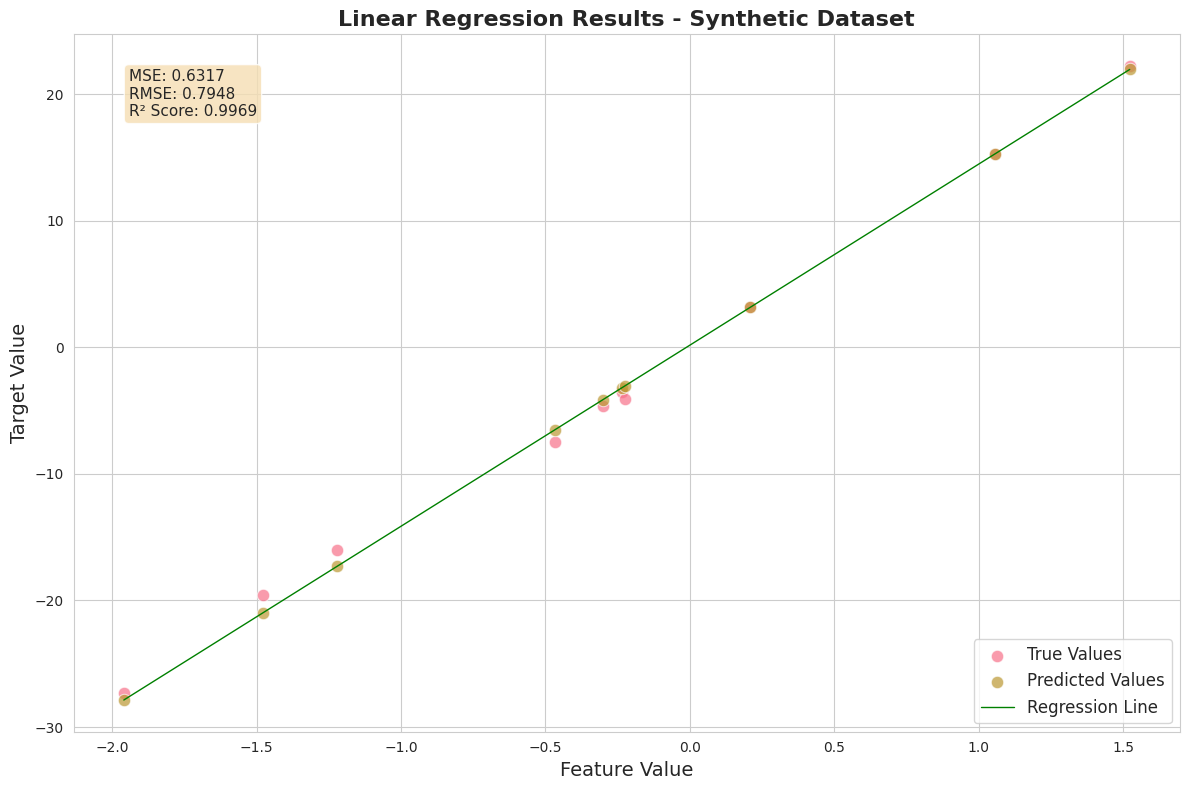

In [11]:
# visualize the results using seaborn
plt.figure(figsize=(12, 8))

# Set seaborn style
sns.set_style("whitegrid")
sns.set_palette("husl")

# Create scatter plots
sns.scatterplot(x=gen_X_test.flatten(), y=gen_y_test, label='True Values', alpha=0.7, s=80)
sns.scatterplot(x=gen_X_test.flatten(), y=gen_y_pred, label='Predicted Values', alpha=0.7, s=80)

# Add regression line
sorted_indices = np.argsort(gen_X_test.flatten())
sorted_X = gen_X_test.flatten()[sorted_indices]
sorted_pred = gen_y_pred[sorted_indices]
sns.lineplot(x=sorted_X, y=sorted_pred, color='green', linewidth=1, label='Regression Line')

# Customize the plot
plt.title('Linear Regression Results - Synthetic Dataset', fontsize=16, fontweight='bold')
plt.xlabel('Feature Value', fontsize=14)
plt.ylabel('Target Value', fontsize=14)
plt.legend(fontsize=12)

# Add text box with metrics
textstr = f'MSE: {mse:.4f}\nRMSE: {rmse:.4f}\nR² Score: {r2:.4f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=11,
         verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

以上就是对线性回归模型测试的完整内容。通过这些测试，我们可以验证模型的各项功能是否正常，并且能够在生成的数据集上进行有效的训练和预测。